In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')

## Lifted from an information sheet in the spreadsheet:
###     Other Practice Staff contains the following healthcare professionals:
        Acupuncturist
        Chiropodist
        Community Psychiatric Nurse
        Counsellor
        Dispenser
        District Nurse
        Health Visitor
        Interpreter/Link Worker
        Osteopath
        Other Practice Staff
        Physiotherapist
        Practice Nurse

In [2]:
tab2b = pd.read_excel('GP_APPT_Publication_April_2021.xlsx', sheet_name= 'Table 2b', header= 12, nrows= 30,
                    usecols= ['__', 'Appointment_Date', 'Total Number of Appointments', 'GP', 'Other Practice staff - calc', 'Unknown'])


tab2b.rename(columns = {'__': 'Day', 'Total Number of Appointments': 'Total_Appointments', 'Other Practice staff - calc': 'Other'}, inplace=True)

tab2b.head()

,Day,Appointment_Date,Total_Appointments,GP,Other,Unknown
0,Thu,2021-04-01,1141269,595034,505052,41183
1,Fri,2021-04-02,15534,4888,9443,1203
2,Sat,2021-04-03,20654,9449,9992,1213
3,Sun,2021-04-04,3418,1727,1365,326
4,Mon,2021-04-05,4897,2176,2246,475


In [3]:
tab2b.tail()

,Day,Appointment_Date,Total_Appointments,GP,Other,Unknown
25,Mon,2021-04-26,1342346,726953,573502,41891
26,Tue,2021-04-27,1253917,645299,569298,39320
27,Wed,2021-04-28,1171524,601179,533006,37339
28,Thu,2021-04-29,1179655,610404,531016,38235
29,Fri,2021-04-30,1157348,630035,488253,39060


In [4]:
tab2b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Day                 30 non-null     object        
 1   Appointment_Date    30 non-null     datetime64[ns]
 2   Total_Appointments  30 non-null     int64         
 3   GP                  30 non-null     int64         
 4   Other               30 non-null     int64         
 5   Unknown             30 non-null     int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 1.5+ KB


In [5]:
tab2b.describe()

,Total_Appointments,GP,Other,Unknown
count,3.000000e+01,30.000000,30.000000,30.000000
mean,7.934171e+05,414592.800000,352774.833333,26049.433333
std,5.558830e+05,293202.536287,245351.170615,17948.239198
min,3.418000e+03,1727.000000,1365.000000,326.000000
25%,5.541650e+04,20898.750000,31175.500000,2049.250000
50%,1.135372e+06,591834.000000,501685.000000,36280.500000
75%,1.173124e+06,614016.750000,532508.500000,39255.000000
max,1.342346e+06,726953.000000,573502.000000,43627.000000


In [6]:
t2bm = tab2b.mean()

<ipython-input-6-0bc1ae8e99d0>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  t2bm = tab2b.mean()


Text(0.5, 1.0, 'Average Specialist Seen April 2021')

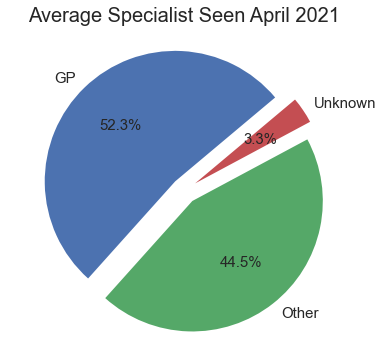

In [7]:
t2bm[1:4].plot.pie(figsize= [10,6], fontsize= 15, explode= [0.1]*3, autopct= '%1.1f%%', startangle= 40, ylabel= ' ').set_title('Average Specialist Seen April 2021', fontsize= 20)

In [8]:
def percentsplit(columns):
    pct1 = round((columns[1]/columns[0])*100, 2)
    pct2 = round((columns[2]/columns[0])*100, 2)
    pct3 = round((columns[3]/columns[0])*100, 2)
    return pct1, pct2, pct3

In [9]:
t2bpct = tab2b[['Total_Appointments', 'GP', 'Other', 'Unknown']].apply(percentsplit, axis= 1)

In [10]:
t2bp = pd.DataFrame(t2bpct.apply(pd.Series))
t2bp.columns=['Percent_GP', 'Percent_Other', 'Percent_Unknown']

In [11]:
t2bp.head()

,Percent_GP,Percent_Other,Percent_Unknown
0,52.14,44.25,3.61
1,31.47,60.79,7.74
2,45.75,48.38,5.87
3,50.53,39.94,9.54
4,44.44,45.86,9.70


In [12]:
t2bp = t2bp.join(tab2b['Appointment_Date'], on= t2bp.index)

In [13]:
t2bp = t2bp[['Appointment_Date', 'Percent_GP', 'Percent_Other', 'Percent_Unknown']]
t2bp.head()

,Appointment_Date,Percent_GP,Percent_Other,Percent_Unknown
0,2021-04-01,52.14,44.25,3.61
1,2021-04-02,31.47,60.79,7.74
2,2021-04-03,45.75,48.38,5.87
3,2021-04-04,50.53,39.94,9.54
4,2021-04-05,44.44,45.86,9.70


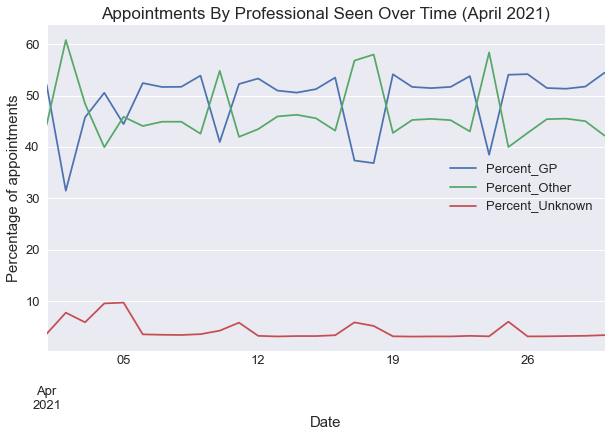

In [14]:
plt = t2bp.plot(kind='line',x= 'Appointment_Date', y= ['Percent_GP', 'Percent_Other', 'Percent_Unknown'], figsize= [10,6], fontsize= 13, grid= True)

plt.set_title('Appointments By Professional Seen Over Time (April 2021)', fontsize= 17)
plt.set_ylabel('Percentage of appointments', fontsize= 15)
plt.set_xlabel('Date', fontsize= 15)
plt.legend(fontsize= 13)